In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("concrete.csv")  # Read the data regarding customer attributes

In [4]:
df.head(5)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
df.tail(5)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [6]:
# Check for Missing Values

In [7]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [9]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [10]:
#Check for duplicate rows
df.duplicated().sum()

25

In [11]:
# Remving duplicates
df = df.drop_duplicates()

In [12]:
# Numerical  - 'cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'

In [13]:
# Univariate Analysis

In [14]:
df.skew().sort_values(ascending=False)

age             3.253974
superplastic    0.980604
slag            0.855225
cement          0.564959
ash             0.497231
strength        0.395696
water           0.034433
coarseagg      -0.065256
fineagg        -0.252353
dtype: float64

In [15]:
df.kurt().sort_values(ascending=False)

age             11.961963
superplastic     1.695396
water            0.167329
fineagg         -0.105881
strength        -0.305309
slag            -0.407179
cement          -0.432458
coarseagg       -0.583049
ash             -1.366694
dtype: float64

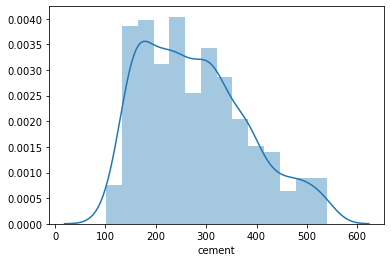

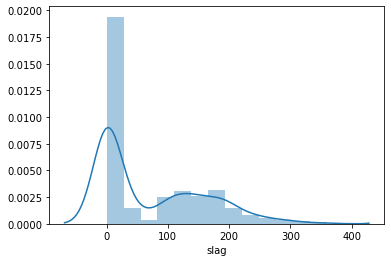

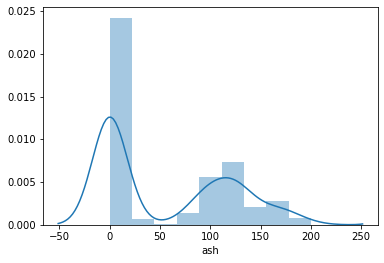

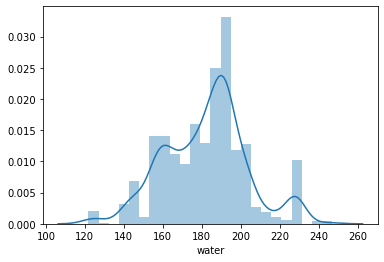

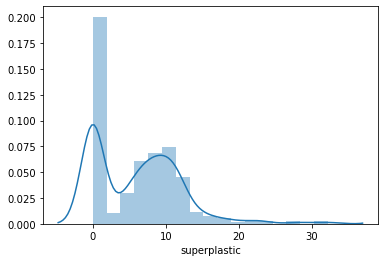

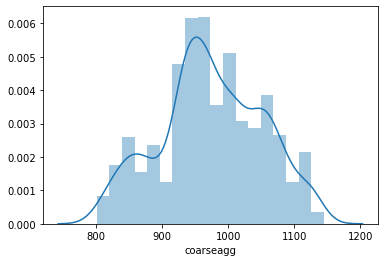

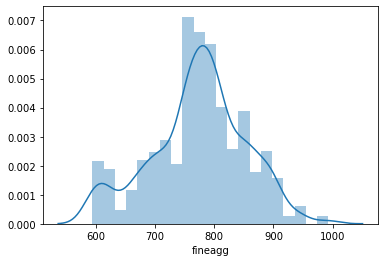

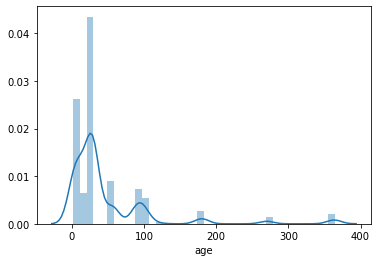

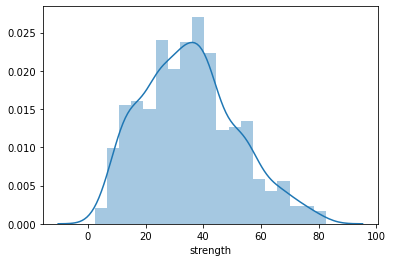

In [16]:
for i,col in enumerate(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']):
    sns.distplot(df[col])
    plt.show()

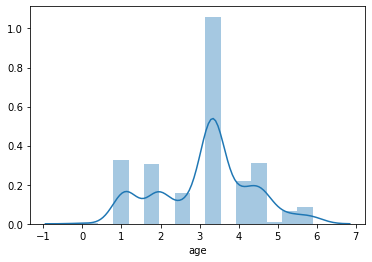

In [17]:
# Best idea is take Log due to skewed distribution
sns.distplot(np.log(df['age']))
plt.show()

In [18]:
#New Variable created
df['age_log'] = np.log10(df['age'])

In [19]:
# Multiple 0 values but based on our domain understanding, this is expected as its part of forming
# a recipe
#Slag 0 values
#Ash 0 values
#Superplastic 0 values
#age discrete values

In [20]:
(df['slag'].value_counts()/df.shape[0]) * 100

0.0      46.766169
189.0     1.592040
24.0      1.393035
20.0      1.194030
145.0     1.094527
           ...    
163.9     0.099502
160.5     0.099502
166.4     0.099502
186.7     0.099502
164.2     0.099502
Name: slag, Length: 185, dtype: float64

In [21]:
(df['ash'].value_counts()/df.shape[0]) * 100

0.0      53.830846
118.3     1.990050
141.0     1.592040
24.5      1.492537
79.0      1.393035
           ...    
90.3      0.099502
108.6     0.099502
194.9     0.099502
160.9     0.099502
89.6      0.099502
Name: ash, Length: 156, dtype: float64

In [22]:
(df['superplastic'].value_counts()/df.shape[0]) * 100

0.0     37.611940
8.0      2.686567
11.6     2.288557
7.0      1.890547
6.0      1.691542
          ...    
3.1      0.099502
11.5     0.099502
19.0     0.099502
10.5     0.099502
12.2     0.099502
Name: superplastic, Length: 111, dtype: float64

In [23]:
(df['age'].value_counts()/df.shape[0]) * 100

28     41.691542
3      12.835821
7      12.139303
56      8.557214
14      6.169154
90      5.373134
100     5.174129
180     2.587065
91      1.691542
365     1.393035
270     1.293532
360     0.597015
120     0.298507
1       0.199005
Name: age, dtype: float64

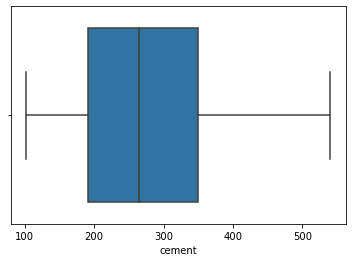

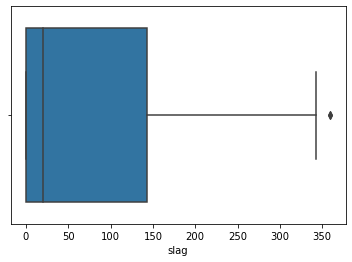

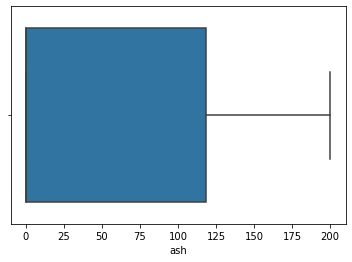

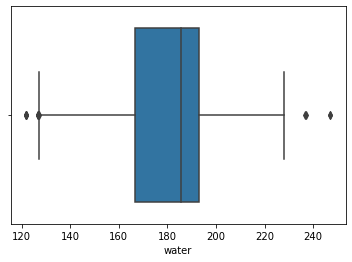

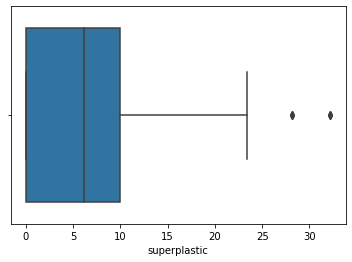

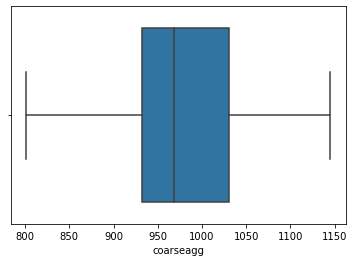

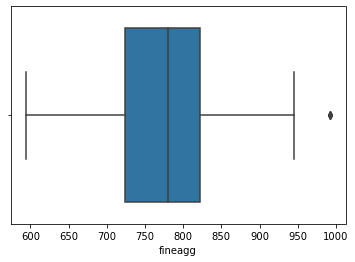

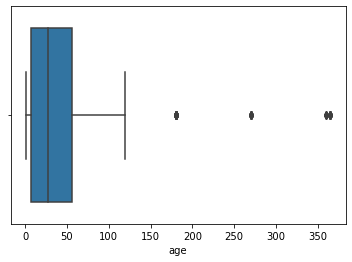

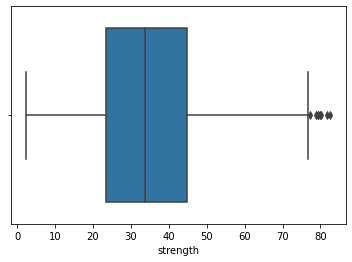

In [24]:
# Box plots for numerical variables
for i,col in enumerate(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']):
    sns.boxplot(df[col])
    plt.show()

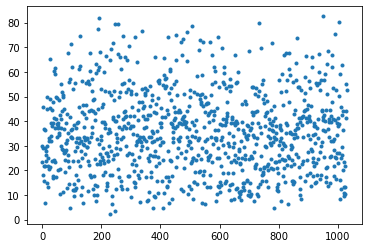

In [25]:
# Checking distribution of Target variable so as to make sure that data isnt ordered from source
plt.plot(df['strength'],'.')

In [26]:
# Bivariate analysis

In [27]:
# Relationshio between age and strength
strength_by_age = df.groupby("age")["strength"].describe().reset_index()
strength_by_age

age  count       mean        std    min      25%     50%      75%    max
0     1    2.0   9.455000   4.504270   6.27   7.8625   9.455  11.0475  12.64
1     3  129.0  18.378140   9.551084   2.33  11.6500  15.520  24.3900  41.64
2     7  122.0  25.182049  13.977200   7.51  14.5100  21.170  35.0950  59.09
3    14   62.0  28.750968   8.638029  12.84  22.3725  26.540  33.6150  59.76
4    28  419.0  36.429570  14.405015   8.54  26.2150  33.730  44.2050  81.75
5    56   86.0  50.715233  13.746612  23.25  39.1800  51.150  60.8825  80.20
6    90   54.0  40.480370   9.819174  21.86  32.9700  39.680  47.7625  69.66
7    91   17.0  68.675882   7.540392  56.50  64.9000  67.800  74.1900  82.60
8   100   52.0  47.668846   8.401673  33.54  40.8225  46.985  53.7200  66.95
9   120    3.0  39.646667   1.104415  38.70  39.0400  39.380  40.1200  40.86
10  180   26.0  41.730385  10.929097  24.10  34.9300  40.905  48.2575  71.62
11  270   13.0  51.272308  10.644833  38.41  42.1300  51.730  55.0600  74.17
12  360    6.0  40.696667   4.171439  33.70  38.8925  41.685  43.7575  44.70
13  365   14.0  43.557857   9.620081  25.08  38.9175  42.815  52.8125  56.14

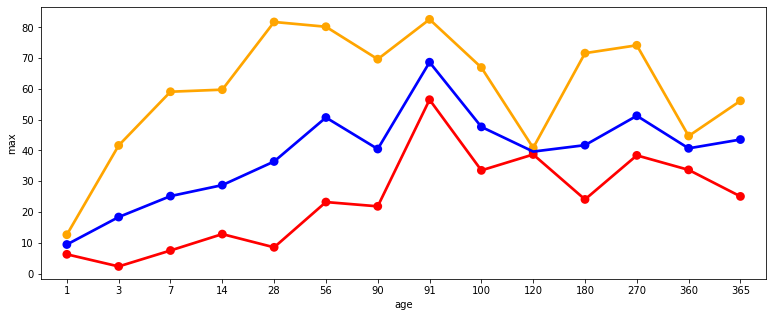

In [28]:
fig = plt.figure(figsize=(13,5))
sns.pointplot(x='age',y='mean',data=strength_by_age,color='blue')
sns.pointplot(x='age',y='min',data=strength_by_age,color='red')
sns.pointplot(x='age',y='max',data=strength_by_age,color='orange')
# Age appears to have positive correlation but drops of at 90 days or so

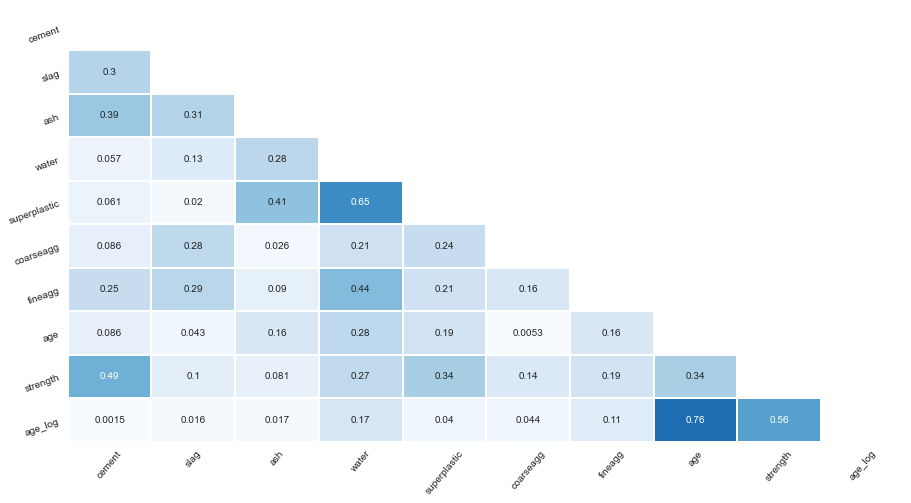

In [29]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()
# Strength has interesting correlations with Cement, Superplastic & Age - Sign that Linear model 
# might work as well

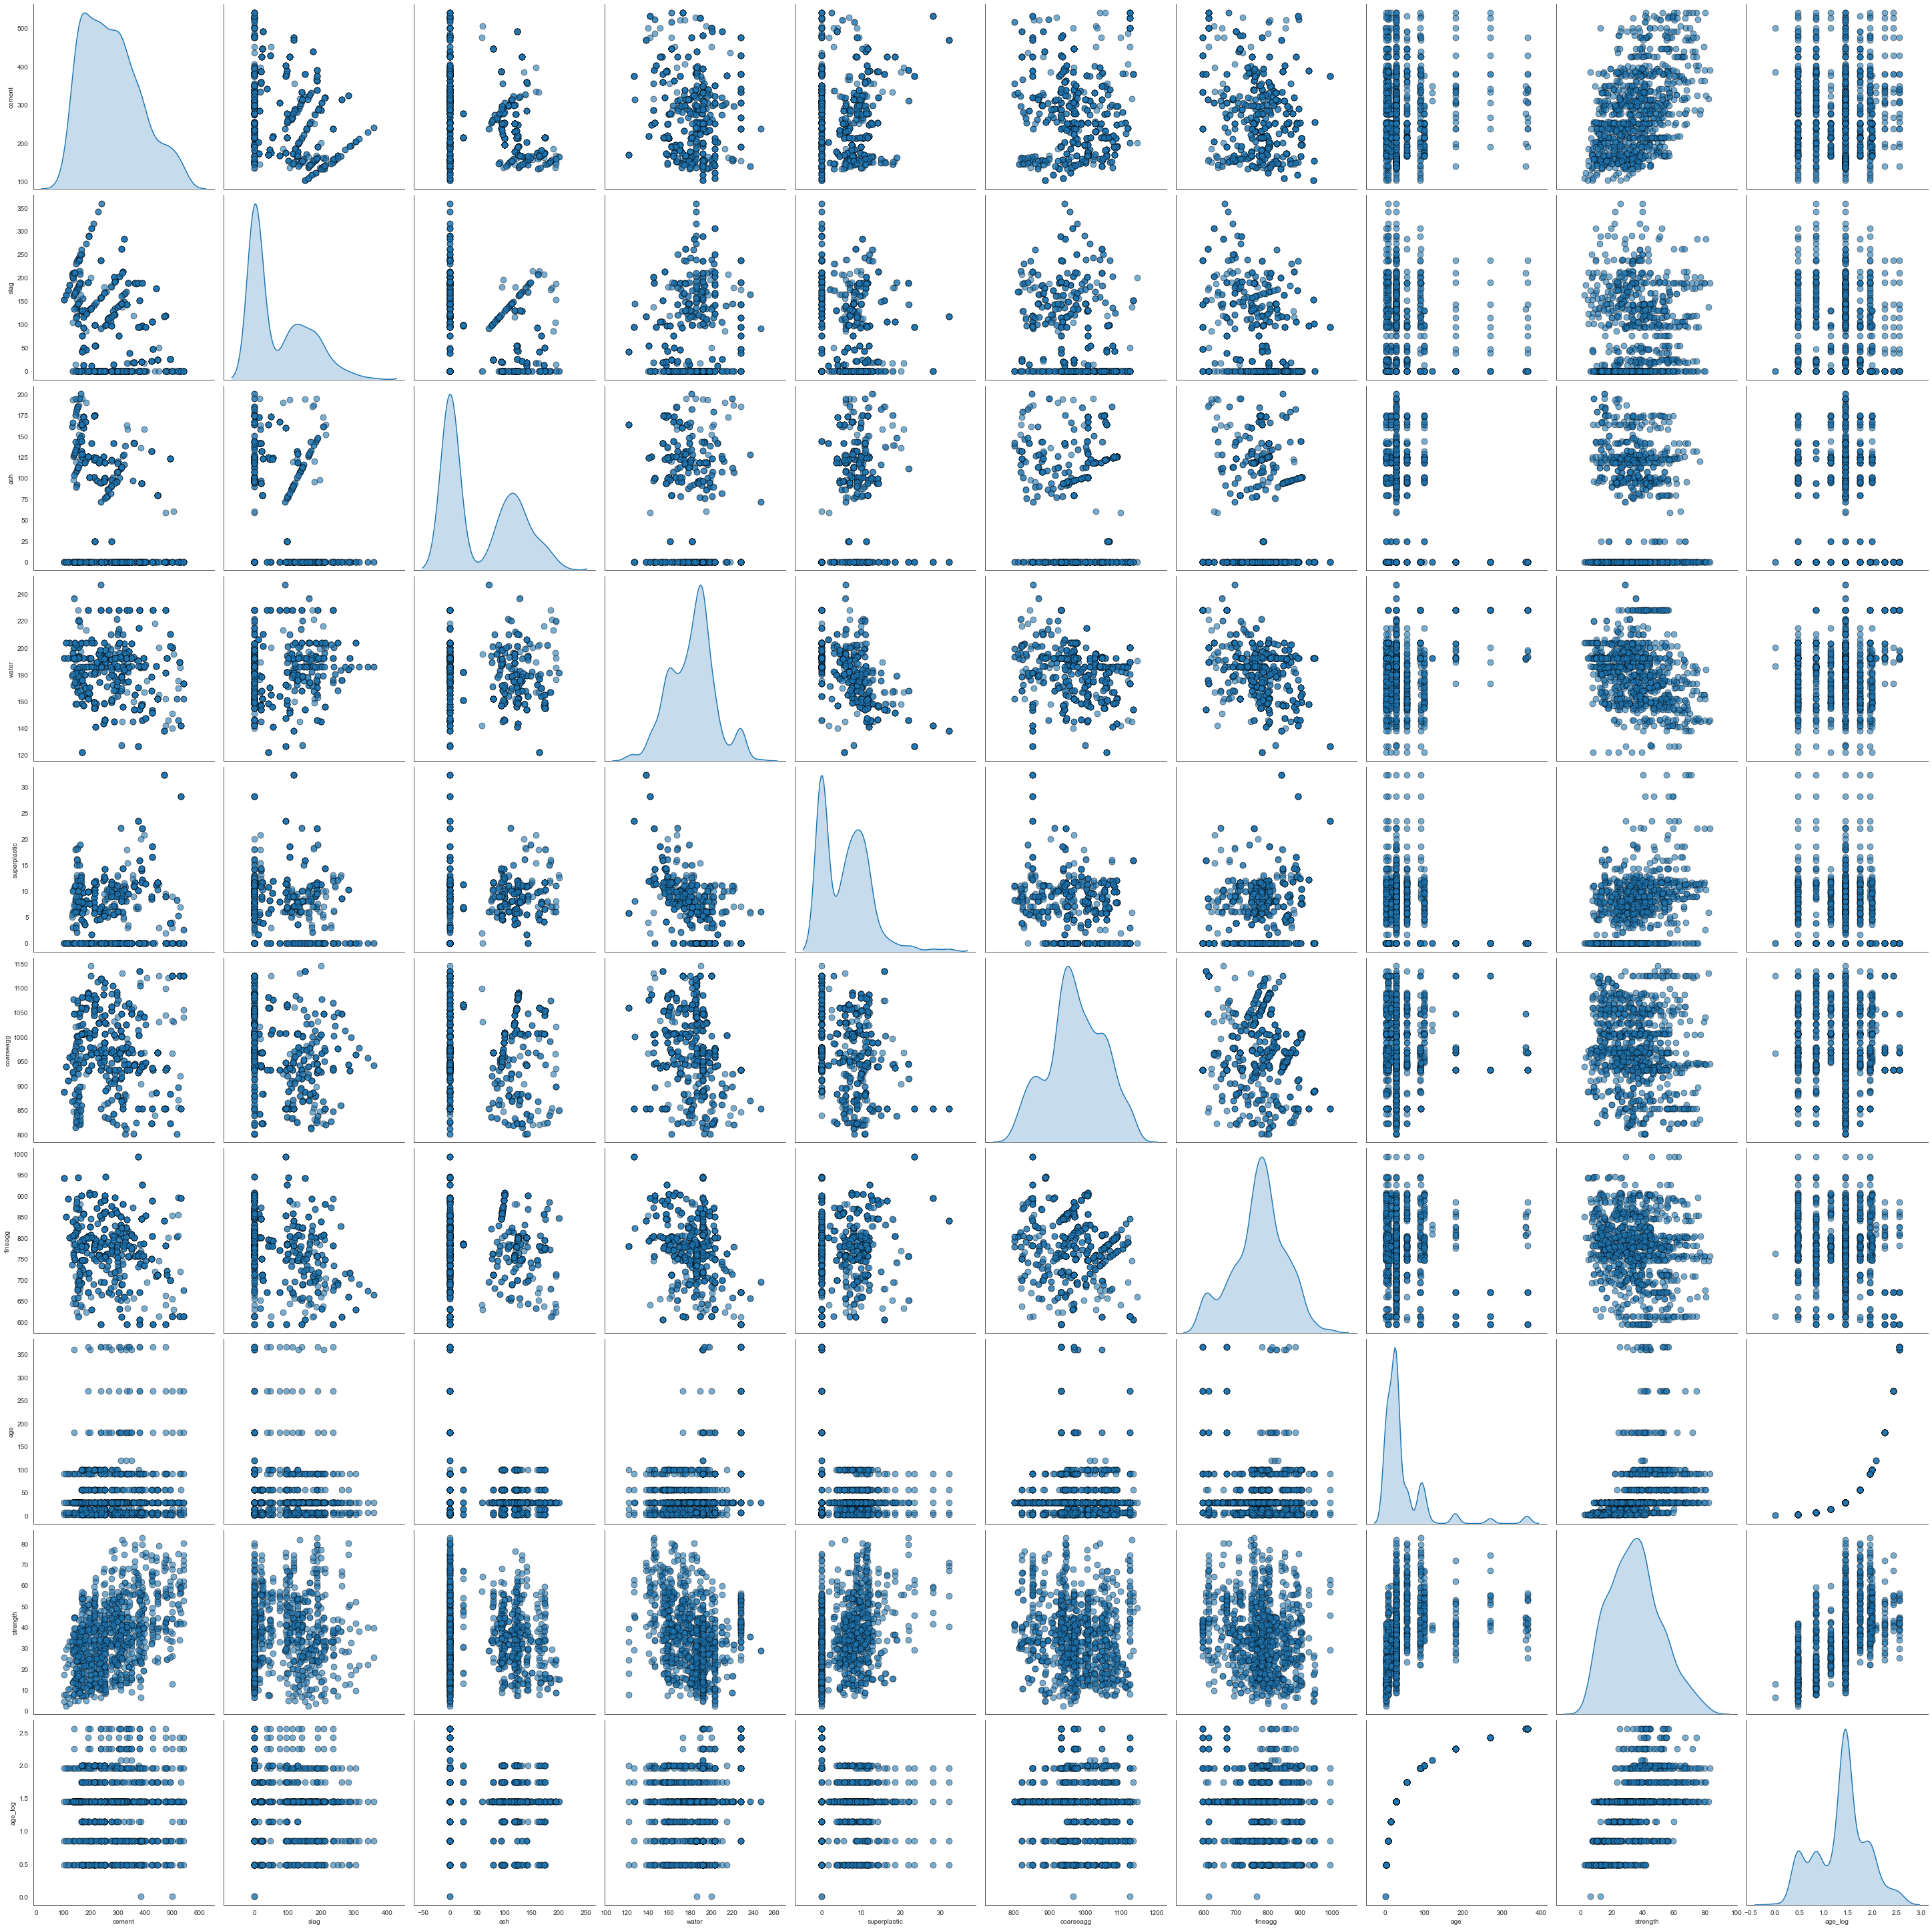

In [30]:
# Pairplot using sns
sns.pairplot(df,diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)

In [31]:
#Strength and Cement relationship

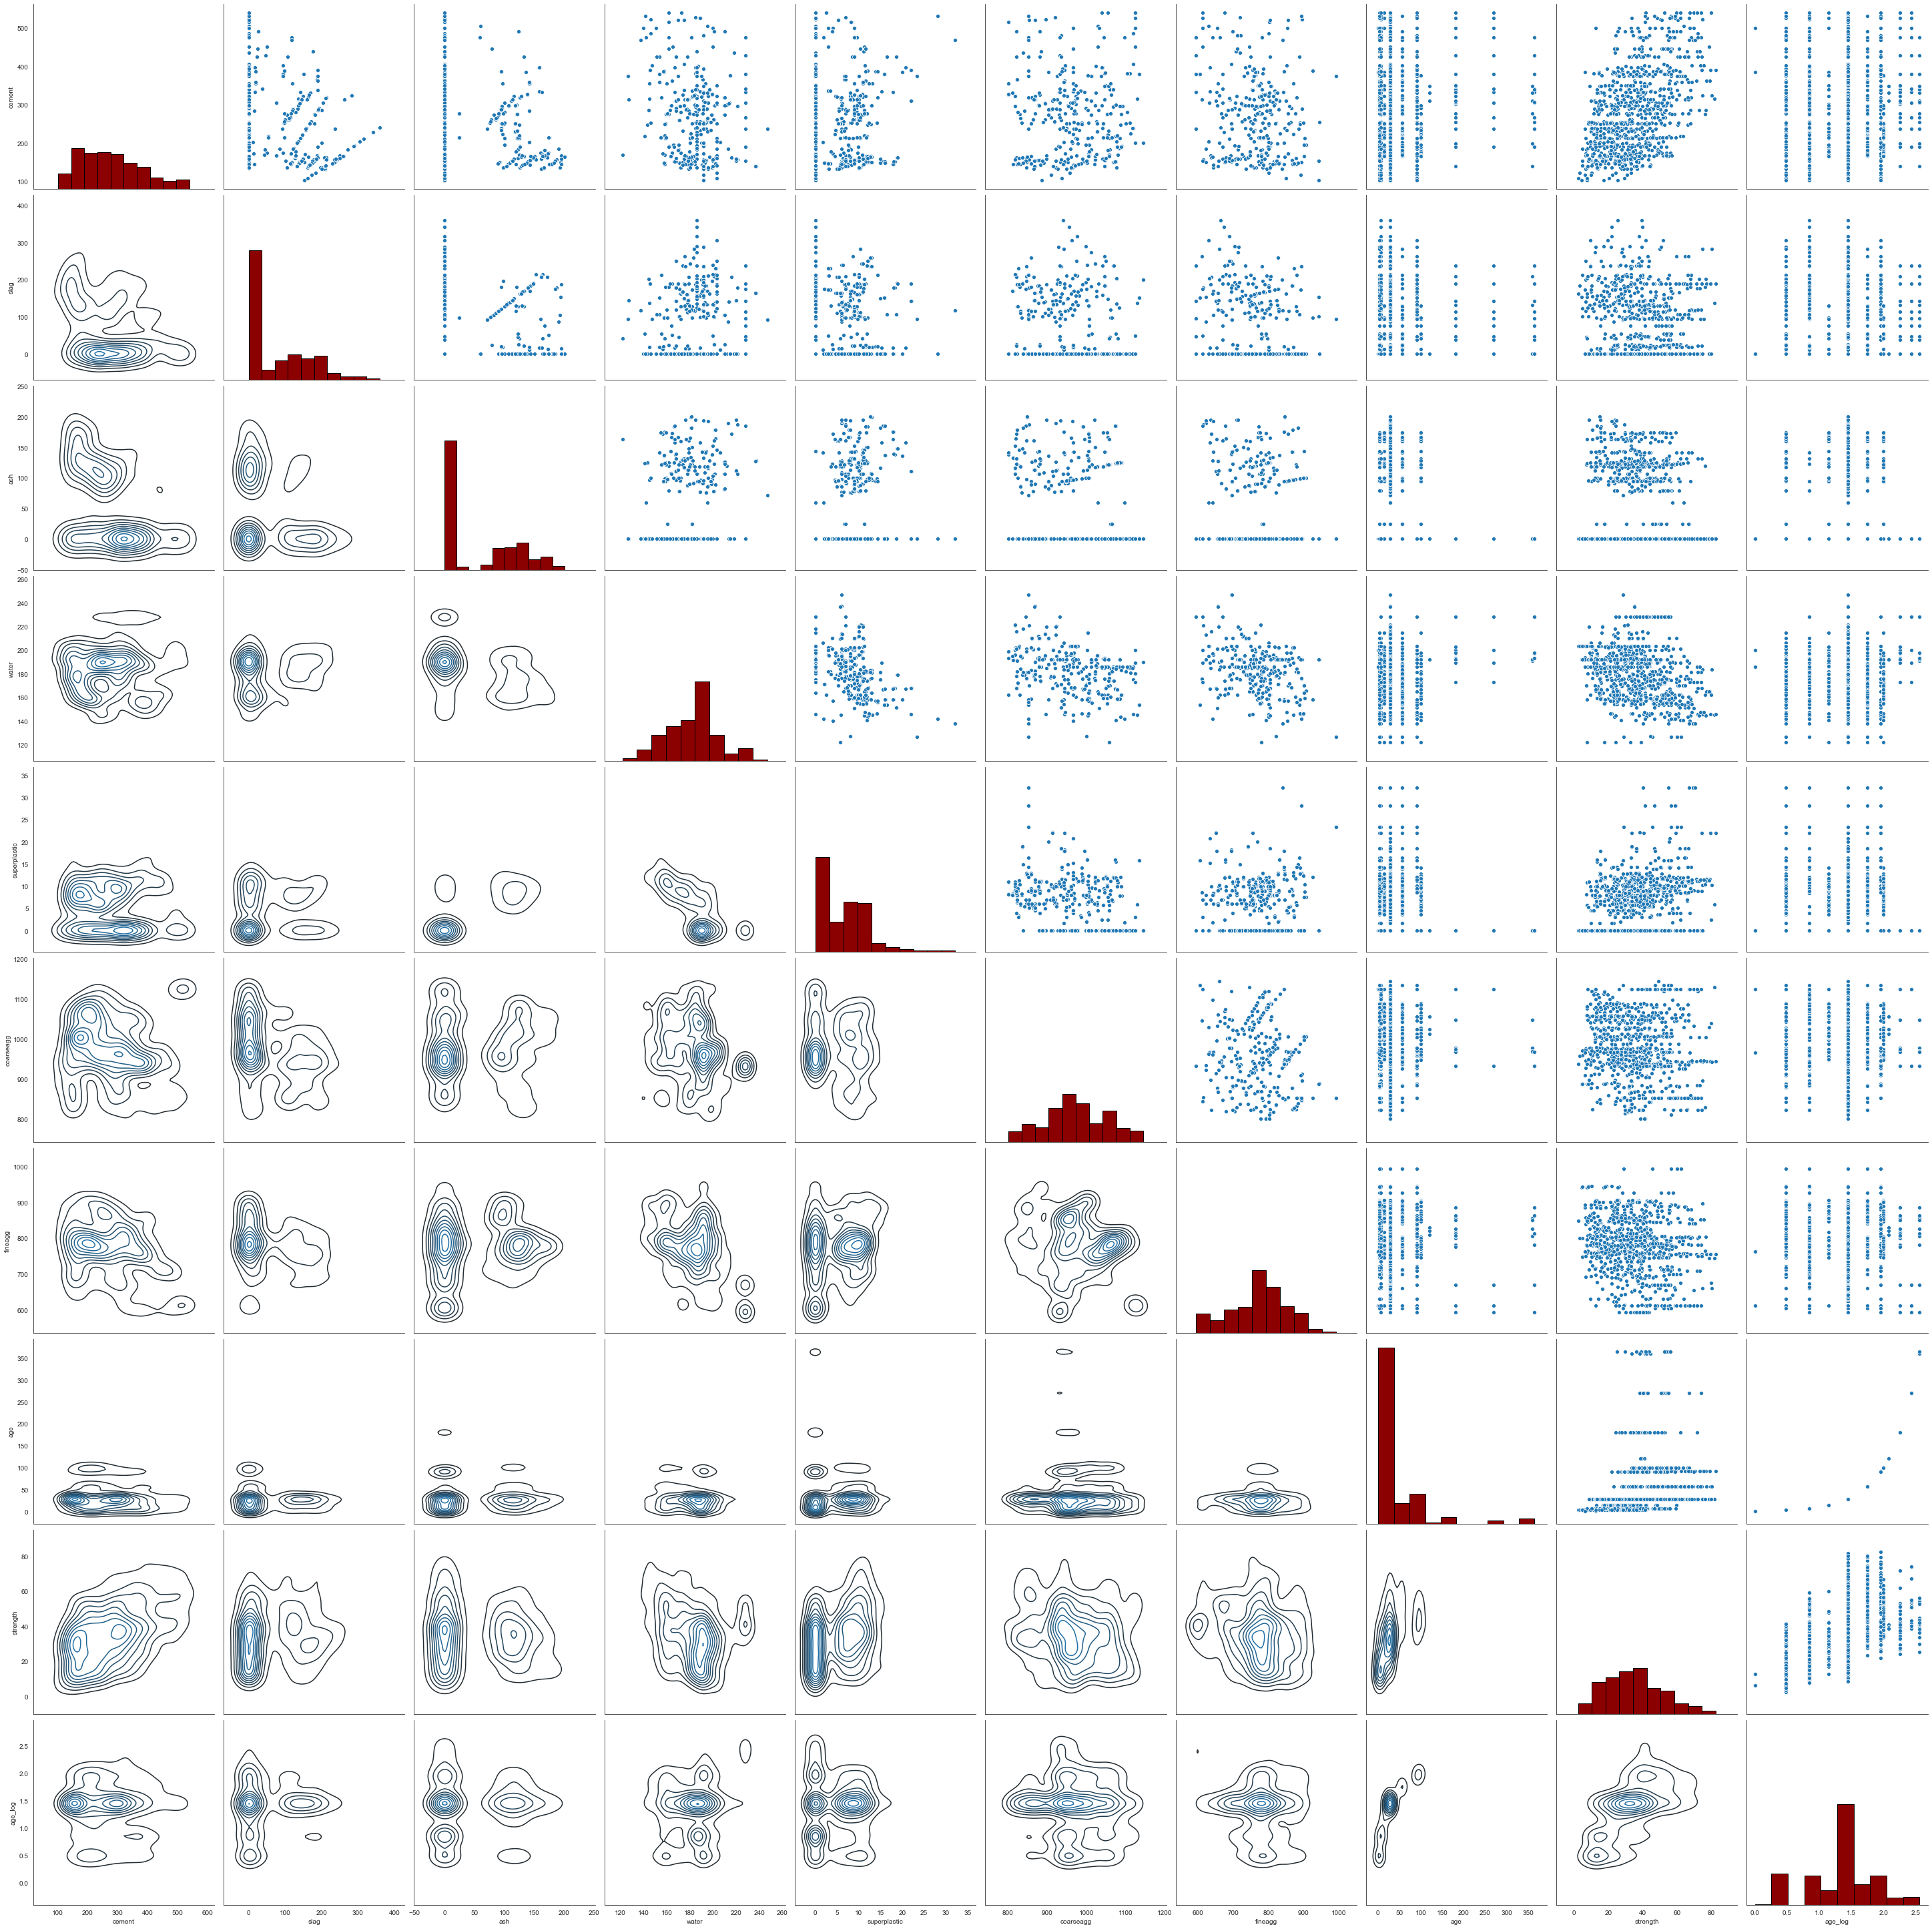

In [32]:
# Another way of visualizing pair plots for reference
grid = sns.PairGrid(data= df, size = 4)
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)

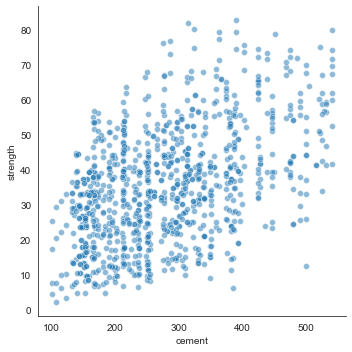

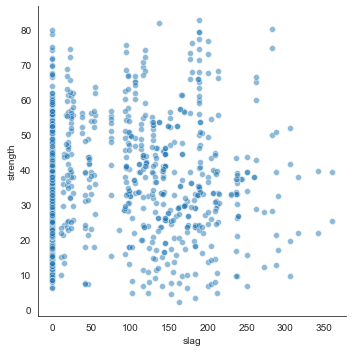

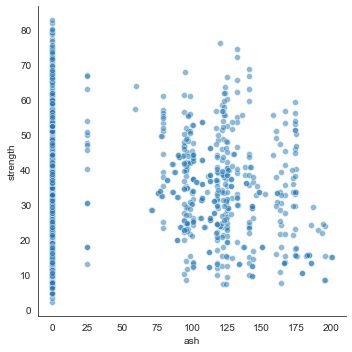

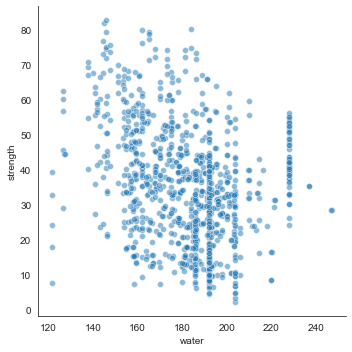

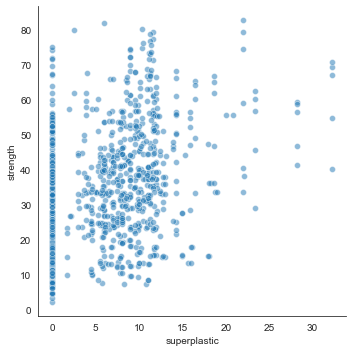

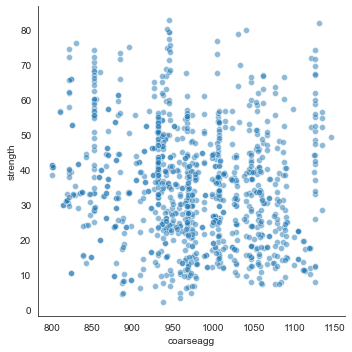

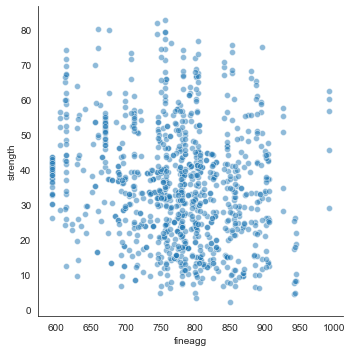

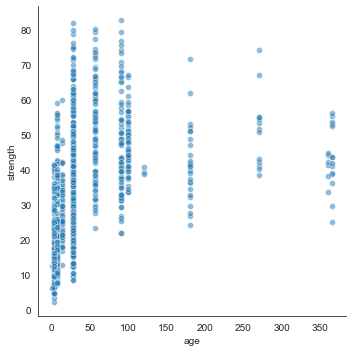

In [33]:
# Strength plot with each variable
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']:
    sns.relplot(x=i, y="strength",sizes=(40, 40), alpha=.5, palette="muted",
            height=5, data=df)

# Feature Creation

In [34]:
# New Feature creation based on Domain Expertise. 
df['water_cement'] = df['water']/df['cement']

In [35]:
df = df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'age_log', 'water_cement', 'strength']]

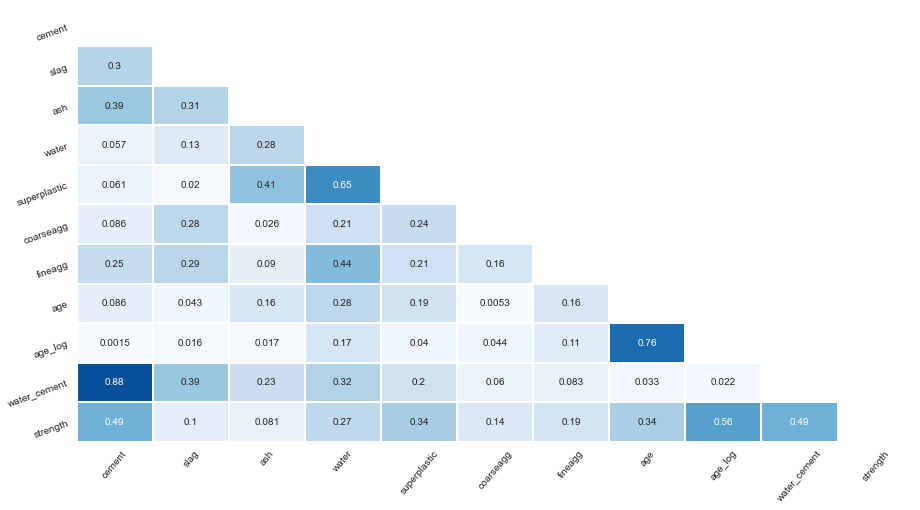

In [36]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [37]:
#Polynomial Feature Creation Example
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2,3],[4,5],[6,7]])
print(data)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)
#,interaction_only=True,include_bias=False

[[2 3]
 [4 5]
 [6 7]]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]


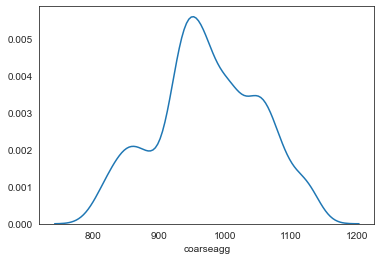

In [38]:
# Can split this data based on Bayesian Multi Mixture models
sns.distplot(df['coarseagg'],hist=False)

In [39]:
from sklearn.mixture import BayesianGaussianMixture
clf = BayesianGaussianMixture(n_components = 3, covariance_type = 'full')
clf.fit(df['coarseagg'].values.reshape(-1,1))

BayesianGaussianMixture(n_components=3)

In [40]:
df['coarseagg_gaussian'] = clf.predict([[i] for i in df['coarseagg'].values])

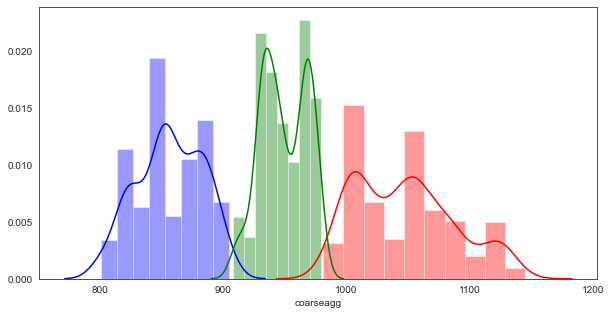

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['coarseagg_gaussian'] == 0]['coarseagg'], color = 'red')
sns.distplot(df[df['coarseagg_gaussian'] == 1]['coarseagg'], color = 'blue')
sns.distplot(df[df['coarseagg_gaussian'] == 2]['coarseagg'], color = 'green')

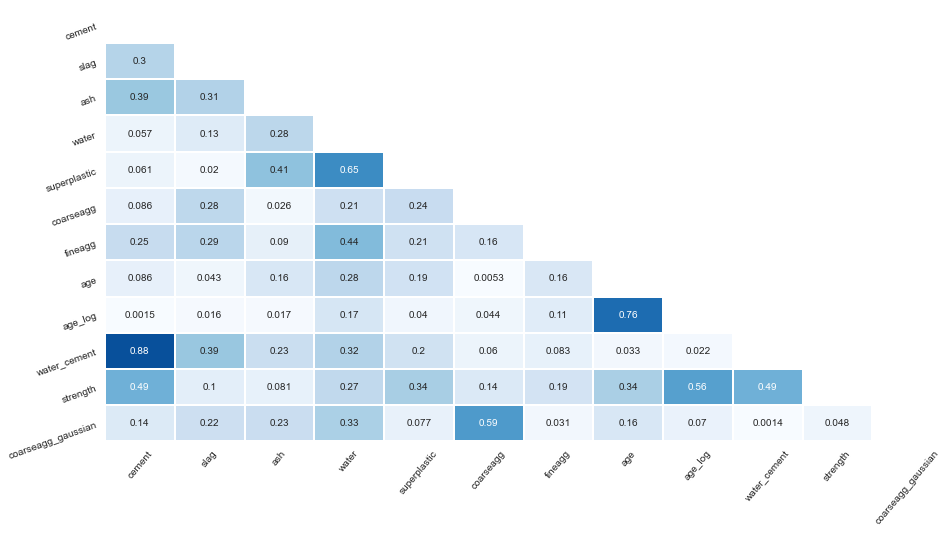

In [42]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

# Modelling

In [43]:
df_copy = df.copy()

In [44]:
df.shape

(1005, 12)

In [45]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'age_log', 'water_cement', 'strength',
       'coarseagg_gaussian'],
      dtype='object')

In [46]:
X = df.drop(['strength','age','water','cement', 'coarseagg_gaussian'],axis=1)

In [47]:
X.columns

Index(['slag', 'ash', 'superplastic', 'coarseagg', 'fineagg', 'age_log',
       'water_cement'],
      dtype='object')

In [48]:
y = df['strength']

In [49]:
##Create diff datasets here - Prefer Train, Test and Validation if sufficient data available
from sklearn.model_selection import train_test_split 

X_Train, X_test, Y_Train, y_test = train_test_split(X,y, random_state = 7,test_size=0.20,train_size=0.80)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.15,train_size =0.85,random_state=7)

In [50]:
X_train.shape

(683, 7)

In [51]:
x_cv.shape

(121, 7)

In [52]:
y_test.shape

(201,)

In [53]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import Pipeline
k =  KFold(random_state=7,n_splits=5)

# KFold will split the data in 5 equal parts

In [54]:
algo= []
train_r2_mean = []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

In [55]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
clf_linear = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', LinearRegression())
])

clf_linear.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearRegression())])

In [56]:
print('Linear Regression')
print(cross_val_score(clf_linear, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_linear, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_linear, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_linear, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Linear Regression
0.7335005125729213
0.7131353305648124
0.04581336393451961
7.9145205775273135


In [57]:
algo.append('Linear Regression')
train_r2_mean.append(cross_val_score(clf_linear, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_linear, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_linear, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_linear, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [58]:
# Linear Regression with Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

clf_linear_poly = Pipeline([('poly',PolynomialFeatures(degree=1)),
    ('scaler',StandardScaler()),
    ('classifier', LinearRegression())
])

clf_linear_poly.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('classifier', LinearRegression())])

In [59]:
print('Linear Regression')
print(cross_val_score(clf_linear_poly, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Linear Regression
0.733500512572921
0.7131353305648126
0.04581336393451948
7.914520577527312


In [60]:
algo.append('Linear Regression with Polynomial Features')
train_r2_mean.append(cross_val_score(clf_linear_poly, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_linear_poly, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [61]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

clf_lasso = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', Lasso())
])

clf_lasso.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', Lasso())])

In [62]:
print('Lasso Regression')
print(cross_val_score(clf_lasso, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_lasso, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_lasso, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_lasso, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Lasso Regression
0.7102723274316869
0.6871151811682307
0.05784447033902149
8.199622138494226


In [63]:
arr = X_train.columns
lasso_coef = clf_lasso.named_steps['classifier'].coef_
df_lasso_imp = pd.DataFrame(arr,lasso_coef).reset_index()
df_lasso_imp.columns = ['value','column']
df_lasso_imp
# Can drop ash, coarseagg & superplastic based on RF results below

value        column
0  3.951414          slag
1  0.000000           ash
2  3.392165  superplastic
3 -0.000000     coarseagg
4 -0.000000       fineagg
5  8.700268       age_log
6 -8.150758  water_cement

In [64]:
algo.append('Lasso Regression')
train_r2_mean.append(cross_val_score(clf_lasso, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_lasso, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_lasso, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_lasso, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [65]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

clf_rf = Pipeline([
    ('classifier', RandomForestRegressor(random_state=7))
])

clf_rf.fit(X_train, y_train)


Pipeline(steps=[('classifier', RandomForestRegressor(random_state=7))])

In [66]:
print('Random Forest Regression')
print(cross_val_score(clf_rf, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_rf, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_rf, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_rf, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Random Forest Regression
0.8858350279710724
0.6682538390189487
0.07017032918426011
8.43084879583347


In [67]:
importances = clf_rf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::1][:]
a = X.columns[:]
features= a
df_rf_imp = pd.DataFrame(features[indices],importances[indices])
df_rf_imp.reset_index(inplace=True)
df_rf_imp.columns=['value','column']
df_rf_imp.sort_values(by="value",ascending=False)
# Drop ash and see how results change

value        column
6  0.412924  water_cement
5  0.356118       age_log
4  0.084435          slag
3  0.062590  superplastic
2  0.039226       fineagg
1  0.028760     coarseagg
0  0.015947           ash

In [68]:
algo.append('Random Forest Regression')
train_r2_mean.append(cross_val_score(clf_rf, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_rf, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_rf, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_rf, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [69]:
# Bagging
from sklearn.ensemble import BaggingRegressor

clf_bag = Pipeline([
    ('classifier', BaggingRegressor(random_state=7))
])

clf_bag.fit(X_train, y_train)


Pipeline(steps=[('classifier', BaggingRegressor(random_state=7))])

In [70]:
print('Bagging')
print(cross_val_score(clf_bag, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_bag, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_bag, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_bag, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Bagging
0.8792837950403417
0.6233619542583545
0.07685119435402116
9.015192368089917


In [71]:
algo.append('Bagging')
train_r2_mean.append(cross_val_score(clf_bag, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_bag, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_bag, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_bag, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [72]:
# Adaptive Boosting
from sklearn.ensemble import AdaBoostRegressor

clf_ada = Pipeline([
    ('classifier', AdaBoostRegressor(random_state=7))
])

clf_ada.fit(X_train, y_train)


Pipeline(steps=[('classifier', AdaBoostRegressor(random_state=7))])

In [73]:
print('Adaptive Boosting Regression')
print(cross_val_score(clf_ada, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_ada, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_ada, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_ada, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Adaptive Boosting Regression
0.768211504693251
0.6244048714408355
0.053011561489474654
9.10113278060811


In [74]:
algo.append('Adaptive Boosting Regression')
train_r2_mean.append(cross_val_score(clf_ada, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_ada, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_ada, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_ada, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [75]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

clf_gb = Pipeline([
    ('classifier', GradientBoostingRegressor(random_state=7))
])

clf_gb.fit(X_train, y_train)


Pipeline(steps=[('classifier', GradientBoostingRegressor(random_state=7))])

In [76]:
print('Gradient Boosting Regression')
print(cross_val_score(clf_gb, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_gb, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_gb, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_gb, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

Gradient Boosting Regression
0.8882563606194489
0.7254233590723713
0.08039301977285943
7.652291565782344


In [77]:
algo.append('Gradient Boosting Regression')
train_r2_mean.append(cross_val_score(clf_gb, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_gb, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_gb, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_gb, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [78]:
# XGB Boosting
from xgboost import XGBRegressor

clf_xgb = Pipeline([
    ('classifier', XGBRegressor(random_state=7))
])

clf_xgb.fit(X_train, y_train)


Pipeline(steps=[('classifier',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=7,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [79]:
print('XGB Regression')
print(cross_val_score(clf_xgb, X_train, y_train, cv=k).mean())
print(cross_val_score(clf_xgb, x_cv, y_cv, cv=k).mean())
print(cross_val_score(clf_xgb, x_cv, y_cv, cv=k).std())
print((-cross_val_score(clf_xgb, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

XGB Regression
0.8990601507281349
0.7240170612050724
0.042064389568729946
7.845989136306507


In [80]:
algo.append('XG Boost Regression')
train_r2_mean.append(cross_val_score(clf_xgb, X_train, y_train, cv=k).mean())
cv_r2_mean.append(cross_val_score(clf_xgb, x_cv, y_cv, cv=k).mean())
cv_r2_std.append(cross_val_score(clf_xgb, x_cv, y_cv, cv=k).std())
cv_rmse_mean.append((-cross_val_score(clf_xgb, x_cv, y_cv, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [81]:
# DataFrame to compare results.
results = pd.DataFrame()
results['Model'] = algo
results['Train R2 score mean'] = train_r2_mean
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

Train R2 score mean  \
Model                                                             
Linear Regression                                      0.733501   
Linear Regression with Polynomial Features             0.733501   
Lasso Regression                                       0.710272   
Random Forest Regression                               0.885835   
Bagging                                                0.879284   
Adaptive Boosting Regression                           0.768212   
Gradient Boosting Regression                           0.888256   
XG Boost Regression                                    0.899060   

                                            CV R2 score mean  CV R2 score std  \
Model                                                                           
Linear Regression                                   0.713135         0.045813   
Linear Regression with Polynomial Features          0.713135         0.045813   
Lasso Regression                                    0.687115         0.057844   
Random Forest Regression                            0.668254         0.070170   
Bagging                                             0.623362         0.076851   
Adaptive Boosting Regression                        0.624405         0.053012   
Gradient Boosting Regression                        0.725423         0.080393   
XG Boost Regression                                 0.724017         0.042064   

                                             CV RMSE  
Model                                                 
Linear Regression                           7.914521  
Linear Regression with Polynomial Features  7.914521  
Lasso Regression                            8.199622  
Random Forest Regression                    8.430849  
Bagging                                     9.015192  
Adaptive Boosting Regression                9.101133  
Gradient Boosting Regression                7.652292  
XG Boost Regression                         7.845989

In [82]:
# For Hyperparameter Tuning, we can check for both Linear & Gradient Boosting Regression and see
# how they perform in comparison on Cross Validation DataSet.

# Hyperparameter Tuning

In [83]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=7)

In [84]:
gb.get_params()
# Command to see Hyper Parameters for a model so you can Hyperparameter tune the model 

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 7,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

In [86]:
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(x_cv, y_cv)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                         

In [87]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [88]:
# Final best model based on Hyperparameters
gb_best = GradientBoostingRegressor(
    n_estimators = 120,
 min_samples_split= 8,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= None,
 learning_rate= 0.1,
    random_state=7)
gb_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=None, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=120, random_state=7)

In [89]:
model = []
tv = []
te = []
rmse = []

In [90]:
from sklearn.metrics import mean_squared_error
model.append('Gradient Boosting after RandomCV')
tv.append(cross_val_score(gb_best, x_cv, y_cv, cv=k).mean())
te.append(gb_best.score(X_test,y_test))
rmse.append(mean_squared_error(y_test,gb_best.predict(X_test))**0.5)

In [91]:
# Best Model run on the Test DataSet

results = pd.DataFrame()
results['Model'] = model
results['Cross Validation Score'] = tv
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

Cross Validation Score  Testing Score  \
Model                                                                     
Gradient Boosting after RandomCV                   0.732       0.933338   

                                      RMSE  
Model                                       
Gradient Boosting after RandomCV  4.211005

In [92]:
# You can also custom create your scoring metrics and run your models on that. 
# Here, i have created a custom score for MAPE that is an industry standard used for Continous
# Variable predictions.
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [93]:
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(MAPE, greater_is_better=False)

In [94]:
# search across 100 different combinations, and use all available cores
random1 = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k
                             , random_state=7,scoring=mape_scorer)

# Fit the random search model
random1.fit(x_cv, y_cv)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                         

In [95]:
random1.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}